In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import legendre, factorial,eval_legendre
from pandas import *
from scipy.optimize import fsolve
from scipy.special import hankel2
from sympy import init_printing, evalf, S,lambdify
from scipy.integrate import quad, odeint
from mpmath import findroot
init_printing()
%matplotlib notebook

In [2]:
def curva(k,a,rα,xα,m,ωhα):
    A1=np.zeros((2,2))
    B1=np.zeros((2,2))
    B2=np.zeros((2,2))
    C1=np.zeros((2,2))
    D1=np.zeros((2,2))
    
    def Ct(k):
        C=hankel2(1,k)/(hankel2(1,k)+np.complex(0,1)*hankel2(0,k))
        return C
    
    F=Ct(k).real
    G=Ct(k).imag
    gh=0
    gα=0
    Ωα=1
    Ωh=(ωhα)**2/rα**2  
    
    Aα1=rα**2*m+(1/8+a**2)
    Aα2=(0.5-a)
    Ah1=xα*m-a
    Cα1=xα*m-a
    Cα2=1
    Ch1=m+1
    
    Raα=-Aα1+(1/4-a**2)*2*G/k-(1/2+a)*2*F/k**2
    Iaα=1/k*(Aα2-(1/2+a)*2*G/k-(1/4-a**2)*2*F)
    Ich=1/k*2*F
    Rch=-Ch1-2*G/k
    
    A1[0,0]=Aα1
    A1[0,1]=Ah1
    A1[1,0]=Cα1
    A1[1,1]=Ch1
    
    A=la.det(A1)
    
    B1[0,0]=Aα1
    B1[0,1]=-(1/2+a)
    B1[1,0]=Cα1
    B1[1,1]=1
    
    B2[0,0]=-(1/2+a)
    B2[0,1]=Ah1
    B2[1,0]=1
    B2[1,1]=Ch1
    
    B=la.det(B1)+(1/2-a)*la.det(B2)
    
    C1[0,0]=Ah1-Aα2
    C1[0,1]=-(1/2+a)
    C1[1,0]=Ch1-Cα2
    C1[1,1]=1
    
    C=la.det(C1)
    
    D1[0,0]=Aα2
    D1[0,1]=Ah1
    D1[1,0]=Cα2
    D1[1,1]=Ch1
    
    D=-la.det(D1)
    
    a2=Ωh*Ωα*(1-gh*gα)
    a1=Ωh*(Raα-gh*Iaα)+Ωα*(Rch-gα*Ich)
    a=A+B*2*G/k+C*2*F/k**2
    
    b2=Ωh*Ωα*(gh+gα)
    b1=Ωh*(Raα*gh+Iaα)+Ωα*(Rch*gα+Ich)
    b=(D+C*2*G/k-B*2*F)/k
    
    
    return np.append(np.array(np.roots([a2,a1,a])),np.roots([b2,b1,b]))

In [3]:
k=np.linspace(0.1,10,1000)

In [212]:
#a=-0.4,m=10,rα=0.5,

array([ 10.        ,   9.90196078,   9.80582524, ...,   0.10001981,
         0.1000099 ,   0.1       ])

In [4]:
#curva(k,a,rα,xα,m,ωhα)
plot=np.zeros((1000,3))
for i in range(1000):
    plot[i]=(curva(k[i],-0.4,0.5,0.3,10,1))

C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [5]:
tm01=np.zeros((2,7))
tm02=np.zeros((2,7))
tm03=np.zeros((2,7))

<IPython.core.display.Javascript object>


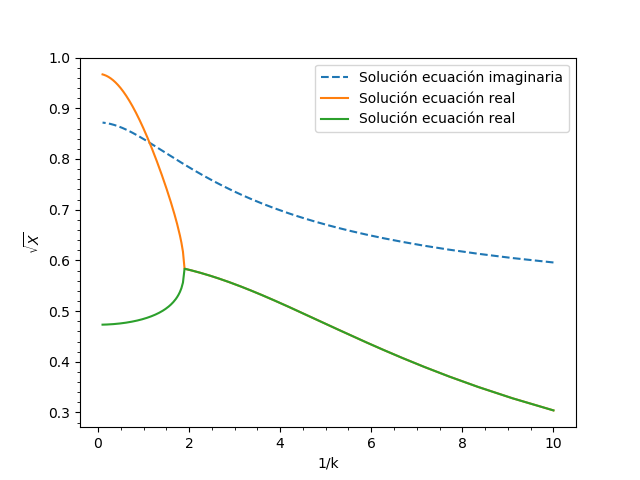

In [13]:
plt.figure()
plt.plot(1/k,1/np.sqrt(plot[:,2]),label='Solución ecuación imaginaria',linestyle='--')
plt.plot(1/k,1/np.sqrt(plot[:,1]),label='Solución ecuación real')
plt.plot(1/k,1/np.sqrt(plot[:,0]),label='Solución ecuación real')
#plt.xlim(0,5)
#plt.ylim(0.375,0.5)
plt.legend(loc='best')
plt.xlabel(r'1/k')
plt.ylabel(r'$\sqrt{X}$')
plt.minorticks_on()
plt.savefig('raiz',dpi=300)

In [809]:
tm03[0,3]=0.5*np.sqrt(10)*1.09945*0.835608
tm03[1,3]=1

In [764]:
tu03

array([[ 2.79553001,  2.66069505,  2.41086368,  2.22250744,  2.15549387,
         0.        ,  0.        ],
       [ 0.        ,  0.2       ,  0.4       ,  0.6       ,  0.8       ,
         0.        ,  0.        ]])

In [362]:
0.5*np.sqrt(20)*0.748157*0.48644

In [72]:
q0=np.loadtxt('0q')
q01=np.loadtxt('01q')
q02=np.loadtxt('02q')
q005=np.loadtxt('005q')
conjunto=np.loadtxt('conjunto')
cw=np.loadtxt('conjuntow')

In [592]:
#np.savetxt('tq',np.asmatrix([tq0[0],tq0[1],tq005[0],tq005[1],tq01[0],tq01[1],tq02[0],tq02[1]]))

In [32]:
tq02=np.asarray((np.loadtxt('tq')[6],np.loadtxt('tq')[7]))#Hacer para los demás valores

<IPython.core.display.Javascript object>


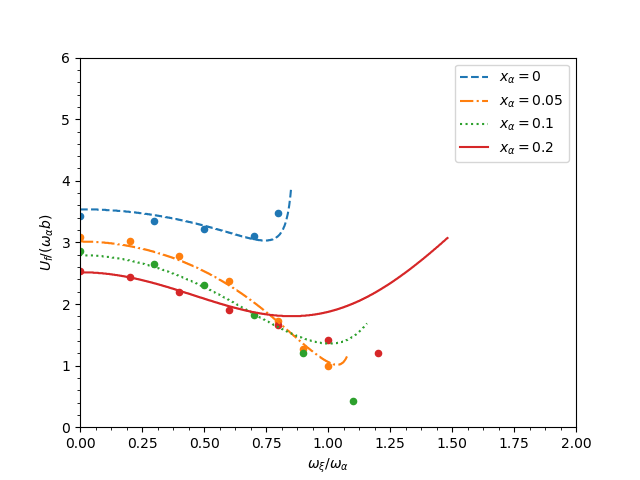

In [178]:
#a=-0.3,m=20,rα=0.5,
fig=plt.figure()
plt.plot(q0[1,:568],q0[0,:568],label=r'$x_{\alpha}=0$',linestyle='--')
plt.plot(q005[1,:718],q005[0,:718],label=r'$x_{\alpha}=0.05$',linestyle='-.')
plt.plot(q01[1,:772],q01[0,:772],label=r'$x_{\alpha}=0.1$',linestyle=':')
plt.plot(q02[1,:988],q02[0,:988],label=r'$x_{\alpha}=0.2$')
plt.scatter(tq0[1,:5],tq0[0,:5],s=20)
plt.scatter(tq005[1],tq005[0],s=20)
plt.scatter(tq01[1,:6],tq01[0,:6],s=20)
plt.scatter(tq02[1],tq02[0],s=20)
plt.xlim(0,2)
plt.ylim(0,6)
plt.legend(loc='best')
plt.xlabel(r'$\omega_{\xi}/\omega_{\alpha}$')
plt.ylabel(r'$U_{f}/(\omega_{\alpha}b)$')
plt.minorticks_on()
plt.savefig('casod',dpi=300)

In [77]:
d02=np.loadtxt('02d')

In [79]:
#np.savetxt('td',np.asmatrix([td02[0],td02[1]]))

In [83]:
td02=np.loadtxt('td')

<IPython.core.display.Javascript object>


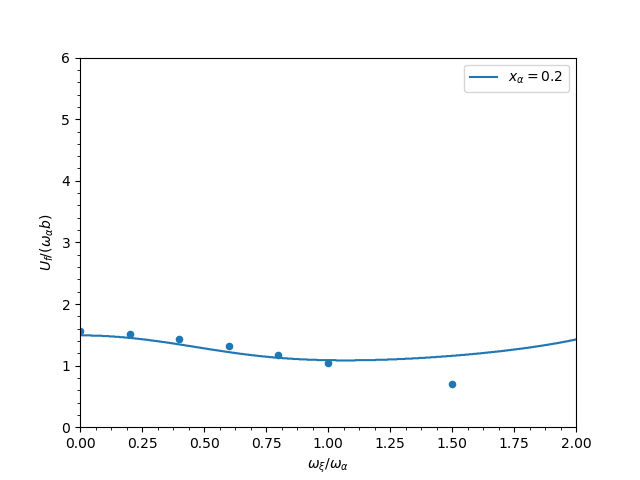

In [175]:
#a=-0.4,m=3,rα=0.5,
fig=plt.figure()
plt.plot(d02[1],d02[0],label=r'$x_{\alpha}=0.2$')
plt.scatter(td02[1],td02[0],s=20)
plt.xlim(0,2)
plt.ylim(0,6)
plt.legend(loc='best')
plt.xlabel(r'$\omega_{\xi}/\omega_{\alpha}$')
plt.ylabel(r'$U_{f}/(\omega_{\alpha}b)$')
plt.minorticks_on()
plt.savefig('casoa',dpi=300)

In [123]:
l01=np.loadtxt('01l')
l02=np.loadtxt('02l')
l03=np.loadtxt('03l')


In [815]:
#np.savetxt('tl13',np.asmatrix([tl01[0],tl01[1],tl03[0],tl03[1]]))

In [816]:
#np.savetxt('tl1',np.asmatrix([tl02[0],tl02[1]]))

In [101]:
tl02=np.loadtxt('tl1')

In [107]:
tl01=np.asarray((np.loadtxt('tl13')[0],np.loadtxt('tl13')[1]))

In [108]:
tl03=np.asarray((np.loadtxt('tl13')[2],np.loadtxt('tl13')[3]))

<IPython.core.display.Javascript object>


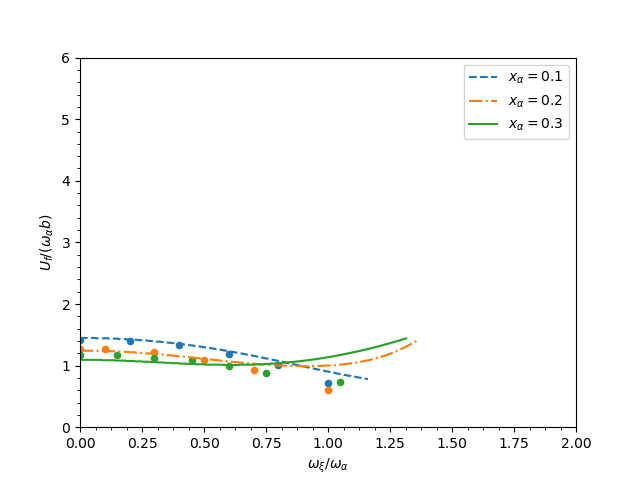

In [176]:
#a=-0.2,m=5,rα=0.5,
fig=plt.figure()
plt.plot(l01[1,:581],l01[0,:581],label=r'$x_{\alpha}=0.1$',linestyle='--')
plt.plot(l02[1,:682],l02[0,:682],label=r'$x_{\alpha}=0.2$',linestyle='-.')
plt.plot(l03[1,:658],l03[0,:658],label=r'$x_{\alpha}=0.3$')
plt.scatter(tl01[1,:6],tl01[0,:6],s=20)
plt.scatter(tl02[1,:6],tl02[0,:6],s=20)
plt.scatter(tl03[1],tl03[0],s=20)
plt.xlim(0,2)
plt.ylim(0,6)
plt.legend(loc='best')
plt.xlabel(r'$\omega_{\xi}/\omega_{\alpha}$')
plt.ylabel(r'$U_{f}/(\omega_{\alpha}b)$')
plt.minorticks_on()
plt.savefig('casob',dpi=300)

In [154]:
u0025=np.loadtxt('0025u')
u01=np.loadtxt('01u')
u02=np.loadtxt('02u')
u03=np.loadtxt('03u')

In [814]:
#np.savetxt('tu',np.asmatrix([tu0025[0],tu0025[1],tu01[0],tu01[1],tu02[0],tu02[1],tu03[0],tu03[1]]))

In [134]:
tu0025=np.asarray((np.loadtxt('tu')[0],np.loadtxt('tu')[1]))
tu01=np.asarray((np.loadtxt('tu')[2],np.loadtxt('tu')[3]))
tu02=np.asarray((np.loadtxt('tu')[4],np.loadtxt('tu')[5]))
tu03=np.asarray((np.loadtxt('tu')[6],np.loadtxt('tu')[7]))

<IPython.core.display.Javascript object>


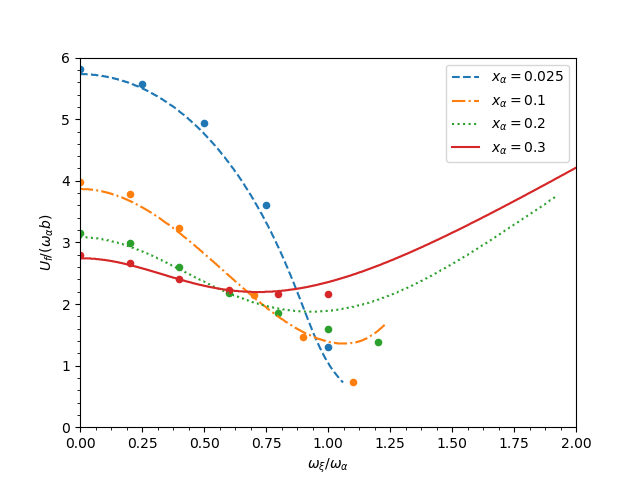

In [179]:
#a=-0.45,m=20,rα=0.5,
fig=plt.figure()
plt.plot(u0025[1,:531],u0025[0,:531],label=r'$x_{\alpha}=0.025$',linestyle='--')
plt.plot(u01[1,:619],u01[0,:619],label=r'$x_{\alpha}=0.1$',linestyle='-.')
plt.plot(u02[1,:962],u02[0,:962],label=r'$x_{\alpha}=0.2$',linestyle=':')
plt.plot(u03[1],u03[0],label=r'$x_{\alpha}=0.3$')
plt.scatter(tu0025[1,:5],tu0025[0,:5],s=20)
plt.scatter(tu01[1,:6],tu01[0,:6],s=20)
plt.scatter(tu02[1],tu02[0],s=20)
plt.scatter(tu03[1,:6],tu03[0,:6],s=20)
plt.xlim(0,2)
plt.ylim(0,6)
plt.legend(loc='best')
plt.xlabel(r'$\omega_{\xi}/\omega_{\alpha}$')
plt.ylabel(r'$U_{f}/(\omega_{\alpha}b)$')
plt.minorticks_on()
plt.savefig('casoe',dpi=300)

In [172]:
m01=np.loadtxt('01m')
m02=np.loadtxt('02m')
m03=np.loadtxt('03m')

In [812]:
#np.savetxt('tm',np.asmatrix([tm01[0],tm01[1],tm02[0],tm02[1],tm03[0],tm03[1]]))

In [159]:
tm01=np.asarray((np.loadtxt('tm')[0],np.loadtxt('tm')[1]))
tm02=np.asarray((np.loadtxt('tm')[2],np.loadtxt('tm')[3]))
tm03=np.asarray((np.loadtxt('tm')[4],np.loadtxt('tm')[5]))

<IPython.core.display.Javascript object>


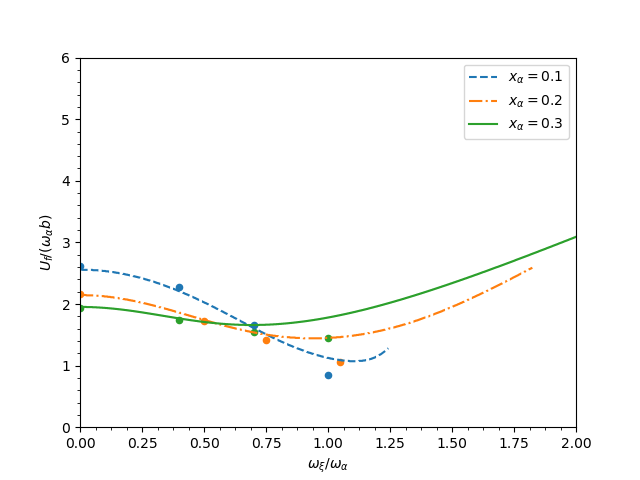

In [177]:
#a=-0.4,m=10,rα=0.5,
fig=plt.figure()
plt.plot(m01[1,:622],m01[0,:622],label=r'$x_{\alpha}=0.1$',linestyle='--')
plt.plot(m02[1,:912],m02[0,:912],label=r'$x_{\alpha}=0.2$',linestyle='-.')
plt.plot(m03[1],m03[0],label=r'$x_{\alpha}=0.3$')
plt.scatter(tm01[1,:4],tm01[0,:4],s=20)
plt.scatter(tm02[1,:4],tm02[0,:4],s=20)
plt.scatter(tm03[1,:4],tm03[0,:4],s=20)
plt.xlim(0,2)
plt.ylim(0,6)
plt.legend(loc='best')
plt.xlabel(r'$\omega_{\xi}/\omega_{\alpha}$')
plt.ylabel(r'$U_{f}/(\omega_{\alpha}b)$')
plt.minorticks_on()
plt.savefig('casoc',dpi=300)